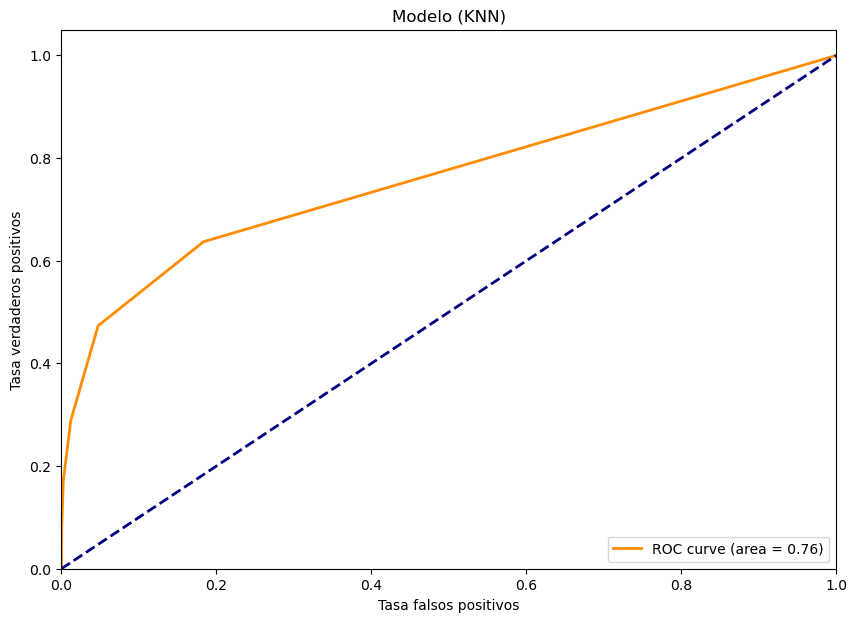

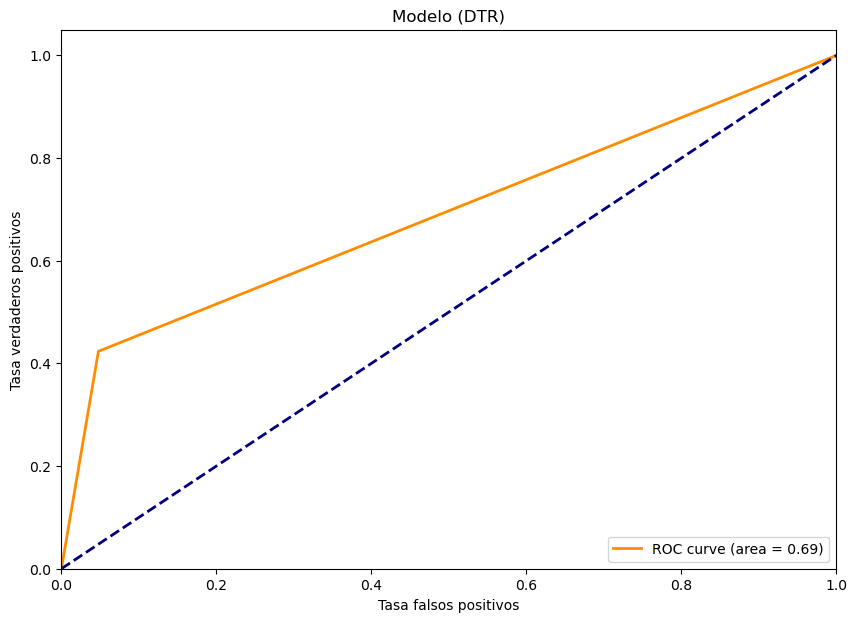

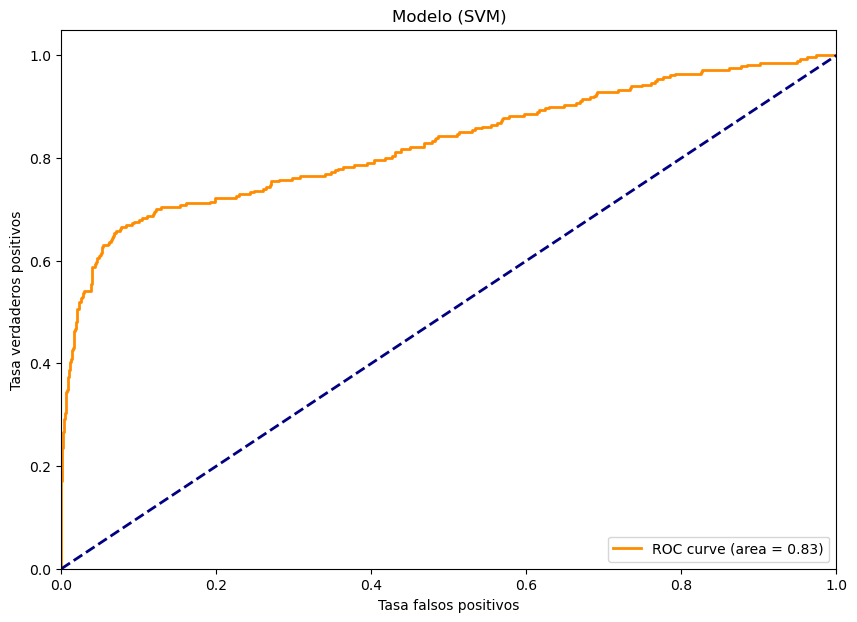

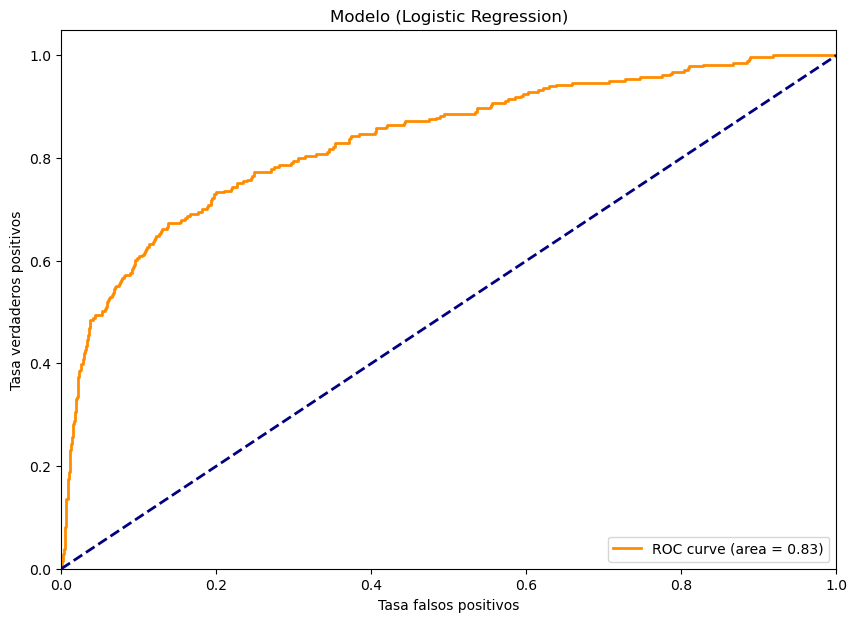

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from typing import Tuple, Dict, Any
import seaborn as sns

def create_plot(subplots: int = 111) -> Tuple[plt.Figure, plt.Axes]:
    fig, ax = plt.subplots(figsize = (12, 6), nrows = 1, ncols = 1)
    return fig, ax

def plot_points(ax: plt.Axes, x, y, scatter_params: Dict[str, Any]):
    ax.scatter(x, y, **scatter_params)

def evaluate_and_plot(model, model_name: str, df: pd.DataFrame):
    
    df["engagement"] = df["engagement"].astype(int)

    X = df.drop(columns=["id", "engagement"])
    y = df["engagement"]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 0)

    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize = (10, 7))
    plt.plot(fpr, tpr, color = "darkorange", lw = 2, label = f"ROC curve (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color = "navy", lw = 2, linestyle = "--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("Tasa falsos positivos")
    plt.ylabel("Tasa verdaderos positivos")
    plt.title(f"Modelo ({model_name})")
    plt.legend(loc = "lower right")
    plt.savefig(f"img/bplt{model_name}_classification_plot.png")
    plt.show()

df = pd.read_csv("csv/train.csv")

evaluate_and_plot(KNeighborsClassifier(n_neighbors = 5), "KNN", df)
evaluate_and_plot(DecisionTreeClassifier(random_state = 42), "DTR", df)
evaluate_and_plot(SVC(random_state = 42, probability = True), "SVM", df)
evaluate_and_plot(LogisticRegression(random_state = 42, max_iter = 10000), "Logistic Regression", df)

In [3]:
def evaluate_and_plot(model, model_name: str, df: pd.DataFrame):
    df["engagement"] = df["engagement"].astype(int)

    X = df.drop(columns = ["id", "engagement"])
    y = df["engagement"]

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    cv_scores = cross_val_score(model, X, y, cv = 5, scoring = "roc_auc")
    print(f"{model_name} Cross-Validation ROC AUC Scores: {cv_scores}")
    print(f"{model_name} Cross-Validation Mean ROC AUC Score: {cv_scores.mean():.4f}")
    print(f"{model_name} Cross-Validation Std ROC AUC Score: {cv_scores.std():.4f}")

df = pd.read_csv("csv/train.csv")

evaluate_and_plot(KNeighborsClassifier(n_neighbors = 5), "KNN", df)
evaluate_and_plot(DecisionTreeClassifier(random_state = 42), "DTR", df)
evaluate_and_plot(SVC(random_state = 42, probability = True), "SVM", df)
evaluate_and_plot(LogisticRegression(random_state = 42, max_iter = 10000), "Logistic Regression", df)

KNN Cross-Validation ROC AUC Scores: [0.82026046 0.78685552 0.80017305 0.80583663 0.77807196]
KNN Cross-Validation Mean ROC AUC Score: 0.7982
KNN Cross-Validation Std ROC AUC Score: 0.0147
DTR Cross-Validation ROC AUC Scores: [0.70321743 0.70883293 0.68083454 0.71056499 0.70096828]
DTR Cross-Validation Mean ROC AUC Score: 0.7009
DTR Cross-Validation Std ROC AUC Score: 0.0106
SVM Cross-Validation ROC AUC Scores: [0.87708833 0.82083333 0.81760061 0.84863649 0.84466393]
SVM Cross-Validation Mean ROC AUC Score: 0.8418
SVM Cross-Validation Std ROC AUC Score: 0.0216
Logistic Regression Cross-Validation ROC AUC Scores: [0.85237144 0.82755129 0.85366074 0.85915696 0.83837399]
Logistic Regression Cross-Validation Mean ROC AUC Score: 0.8462
Logistic Regression Cross-Validation Std ROC AUC Score: 0.0116
